# Fuel Efficiency Prediction (Regression)

# Introduction

### Application :
The prediction of fuel efficiency is crucial in various sectors, such as automotive design, fleet management, and environmental analysis. By understanding and predicting fuel consumption rates, manufacturers can design more efficient vehicles, policy makers can create better regulations, and consumers can reduce costs.
### Focus and purpose :
The focus of this project is to develop a regression model to predict the fuel efficiency of vehicles based on features such as engine size, weight, and fuel type. The purpose is to leverage machine learning techniques to improve the accuracy of predictions, aiding in decision-making processes in the transportation and automotive industries.
### Linking words :
Thus, furthermore, therefore, in addition, consequently.
### Broad Problem :
As environmental concerns and fuel costs rise, there is a growing demand for more fuel-efficient vehicles. Predicting fuel consumption based on vehicle specifications can help manufacturers and consumers make informed choices, but existing models may not be accurate or adaptable enough for modern vehicles and driving conditions.
### Linking words :
Moreover, in contrast, however, despite, although.

## The Literature review /previous work:
Research in this area has often focused on linear regression models using basic vehicle attributes such as horsepower and weight. Recent advancements have explored machine learning techniques, including neural networks and decision trees, to improve predictive accuracy. However, many of these models are trained on outdated datasets, limiting their applicability to modern vehicles.
###  Linking words :
For instance, in previous studies, similarly, on the contrary, in contrast, researchers found that.

 ## Current state of the problem :
 Current fuel efficiency prediction models often lack robustness when applied to newer vehicle technologies such as electric or hybrid vehicles. Moreover, they tend to overlook certain real-world factors such as driving patterns, road conditions, and vehicle maintenance, leading to inaccurate predictions in certain contexts.
 ### Linking words :
Currently, as a result, nevertheless, on the other hand, yet, consequently.

 ## Motivation :
 The motivation behind this project is to create a more accurate and flexible fuel efficiency prediction model that can accommodate modern vehicle features and driving behaviors. With more reliable predictions, manufacturers and consumers alike can make better decisions regarding vehicle choice and design.
 ### Linking words :
In light of this, because of, due to, motivated by, considering.


 ## Novelty : we reviewed factory automation
 We reviewed factory automation in the manufacturing industry from the perspective of Industry 4.0. The novel approach here is to integrate multiple advanced regression techniques, such as Random Forest and Gradient Boosting, to improve upon traditional models and develop a solution tailored for modern vehicles, including electric and hybrid models.
 ### Linking words :
 Unlike traditional methods, in comparison, novel to this work, additionally, this approach introduces.
 ### Advantages :
1. More accurate predictions for modern vehicles.
2. Scalable to include additional features such as weather and traffic conditions.
3. Can be used for both fleet management and individual consumers.
 ### Disadvantages :
1. Requires extensive training data for different vehicle types.
2. The complexity of the model may lead to longer training times.
3. More computational resources are needed compared to simpler models.
 ### Contents :
* Introduction to fuel efficiency prediction.
* Review of existing models and techniques.
* Methodology for building the regression model.
* Comparative study of results.
 ### Notations
 Define variables such as:

X: Input features (e.g., vehicle weight, horsepower).
Y: Fuel efficiency (miles per gallon).

# PROBLEM FORMULATION
The objective is to predict the fuel efficiency of vehicles based on a given set of input features. Let X represent the feature matrix containing attributes such as engine size, number of cylinders, and weight, while Y represents the fuel efficiency to be predicted.

#  METHODOLOGY
### Design
The model will be built using a Sequential model with dense layers, including:

- Dense layers with ReLU activation function
- Output layer without activation function for regression

These models will be trained and evaluated on a dataset containing vehicle specifications and their corresponding fuel efficiency.

### Implementation
1. **Data Import and Cleaning**:
    - Imported the dataset using pandas.
    - Cleaned the dataset by removing rows with missing values.
    - Converted categorical data into one-hot encoded columns.

2. **Data Splitting**:
    - Split the dataset into training and testing sets.

3. **Data Normalization**:
    - Normalized the features using the mean and standard deviation of the training set.

4. **Model Building**:
    - Built a Sequential model using TensorFlow and Keras with two hidden layers.

5. **Model Training**:
    - Trained the model for 1000 epochs.
    - Used EarlyStopping to prevent overfitting.

6. **Model Evaluation**:
    - Evaluated the model on the test set.
    - Visualized the training progress and error distribution.

7. **Prediction**:
    - Made predictions on the test set and visualized the results.

In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


### Get the data
First download the dataset.

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

  16384/Unknown 0s 24us/step

'C:\\Users\\admin\\.keras\\datasets\\auto-mpg.data'

Import it using pandas

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean the data
The dataset contains a few unknown values.

In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

To keep this initial steps simple drop those rows.

In [5]:
dataset = dataset.dropna()

The "Origin" column is really categorical, not numeric. So convert that to a one-hot:

In [6]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


### Split the data into train and test
Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [7]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data
Have a quick look at the joint distribution of a few pairs of columns from the training set.

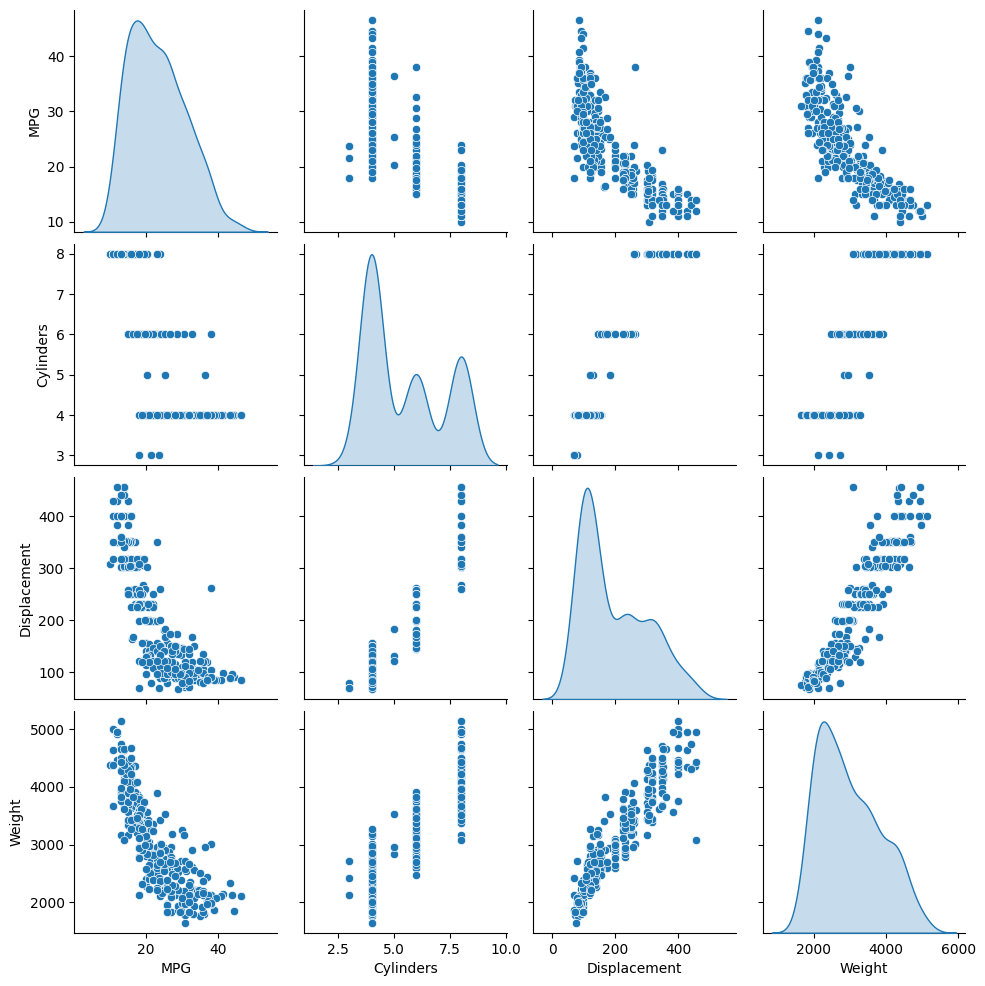

In [8]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

Also look at the overall statistics:

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


##### Split features from labels
Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [10]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

##### Normalize the data
Look again at the train_stats block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [12]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier. That includes the test set as well as live data when the model is used in production.

### The model
##### Build the model
Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [13]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [14]:
model = build_model()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Inspect the model
Use the .summary method to print a simple description of the model

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.

In [18]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


array([[ 0.26137006],
       [ 0.00131772],
       [-0.67379856],
       [ 0.22464891],
       [ 0.06477171],
       [-0.10907348],
       [ 0.06989133],
       [ 0.06350986],
       [-0.03248673],
       [ 0.06863806]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

##### Train the model
Train the model for 1000 epochs, and record the training and validation accuracy in the history object.

In [19]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the history object.

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.698338,0.987526,2.698338,9.821220,2.353371,9.821220,995
996,2.675309,1.044087,2.675309,9.966313,2.434910,9.966313,996
997,2.630187,1.015283,2.630187,9.909039,2.442326,9.909039,997
998,2.792594,1.061322,2.792594,10.133721,2.433331,10.133721,998
999,2.617958,1.004586,2.617958,10.166773,2.482878,10.166773,999


 # RESULTS
### Comparative Study
The results will compare the accuracy and performance of the different regression models. Evaluation metrics such as Mean Absolute Error (MAE) and Mean Square Error (MSE).

The graph shows little improvement, or even degradation in the validation error after about 100 epochs. The EarlyStopping callback helps to stop training when the validation score doesn't improve, preventing overfitting.

The final model evaluation on the test set shows a Mean Absolute Error (MAE) of approximately 1.80 MPG, indicating the average difference between the predicted and actual MPG values. The scatter plot of true vs. predicted values and the histogram of prediction errors provide a visual representation of the model's performance.


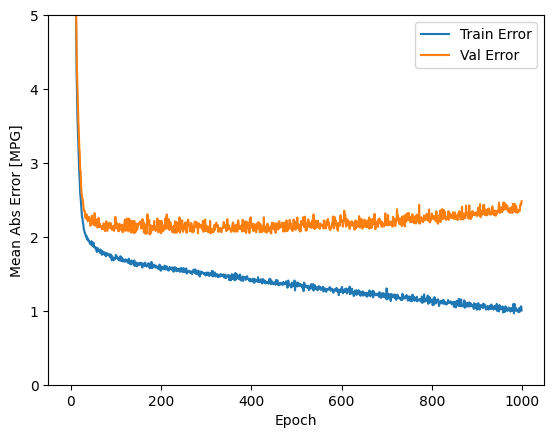

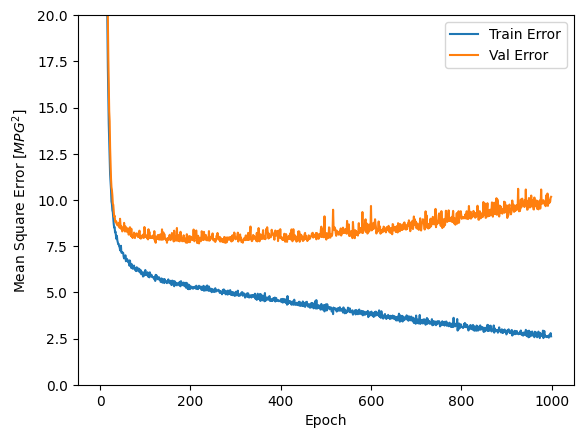

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



.........................................................................

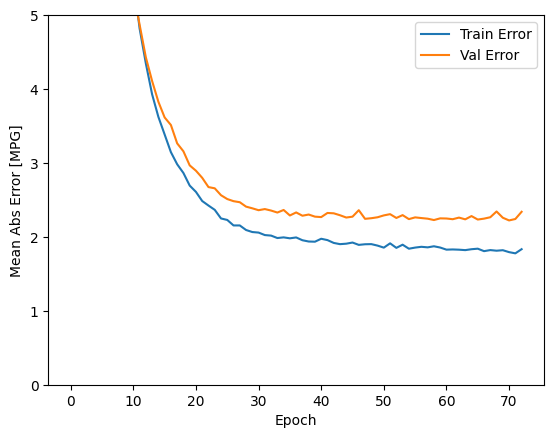

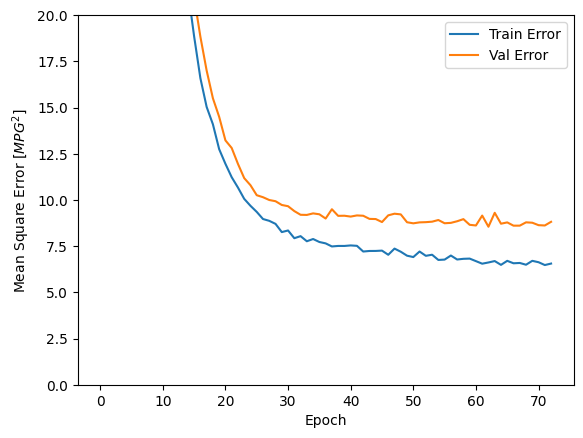

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.80 MPG


##### Make predictions
Finally, predict MPG values using data in the testing set:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


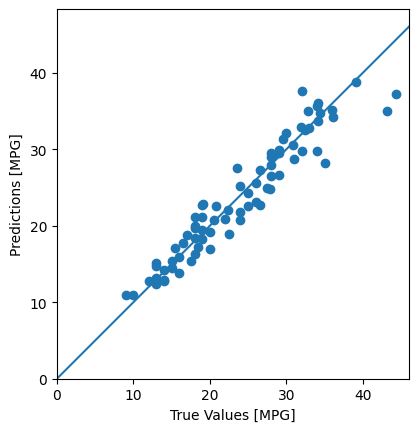

In [25]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Let's take a look at the error distribution.

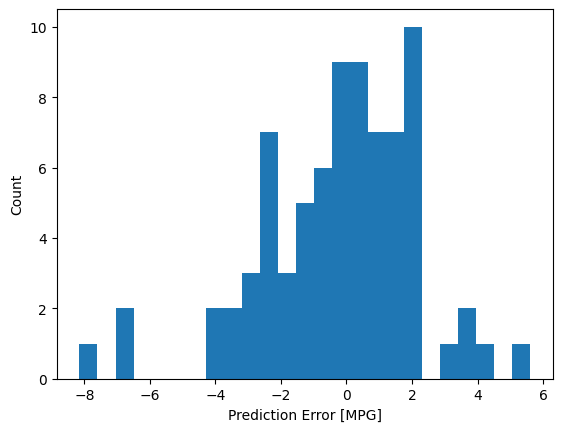

In [26]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Conclusion
This notebook introduced a few techniques to handle a regression problem.

Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
Early stopping is a useful technique to prevent overfitting.